# Medical Cost Prediction

The aim of this analysis is to predict the medical expense based on the patients'information. The dataset used for this analysis is Insurance dataset from [Kaggle](https://www.kaggle.com/mirichoi0218/insurance). The dataset contains 1338 observations and 7 variables. The variables are as follows:


| Variable | Description |
| --- | --- |
| age | age of primary beneficiary |
|bmi | body mass index |
|children | number of children covered by health insurance |
|smoker | smoking |
|region | the beneficiary's residential area in the US |
|charges | individual medical costs billed by health insurance |

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing

In [3]:
#number of rows and columns
df.shape

(1338, 7)

In [4]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# identifying the duplicated cells
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

In [7]:
# removing the duplicated cell
df = df.drop_duplicates()

In [8]:
#checking discriptive statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#value counts for categorical variables
print(df.sex.value_counts(),'\n',df.smoker.value_counts(),'\n',df.region.value_counts())

male      675
female    662
Name: sex, dtype: int64 
 no     1063
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


Replacing the categorical variables with numerical values.
- sex : 1 - male, 0 - female
- smoker : 1 - yes, 0 - no
- region : 0 - northeast, 1 - northwest, 2 - southeast, 3 - southwest

In [10]:
#changing categorical variables to numerical
df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [11]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,1,3756.62160
6,46,0,33.440,1,0,1,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [12]:
df.dtypes 

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [13]:
# creating another copy of the original dataset
df1 = df.copy()

df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Generating BMI categories where 0 corresponds to underweight, 1 denotes a healthy weight, 2 signifies overweight, and 3 represents obesity

In [14]:
# creating a cactegorical variacle for easier modellnig
bmi_edges = [0,18.5,25,30,54]

bmi_labels = [0, 1, 2, 3]

df1['bmi_cat'] = pd.cut(df1['bmi'], bins = bmi_edges, labels = bmi_labels, right=False).astype(int)

In [15]:
# dropping the bmi and bmi_cat colums due to multicolinearity
df1.insert(2, "bmi_categories", df1['bmi_cat'])

df1.drop(["bmi","bmi_cat"], axis = 1, inplace = True)

In [16]:
df1.head()

,age,sex,bmi_categories,children,smoker,region,charges
0,19,0,2,0,1,0,16884.92400
1,18,1,3,1,0,1,1725.55230
2,28,1,3,3,0,1,4449.46200
3,33,1,1,0,0,2,21984.47061
4,32,1,2,0,0,2,3866.85520


## Exploratory Data Analysis

Visualizing data provides an effective method for comprehending its characteristics. In this segment, I will create plots depicting the distribution of each variable. This approach will offer insights into their frequencies and overall distributions.

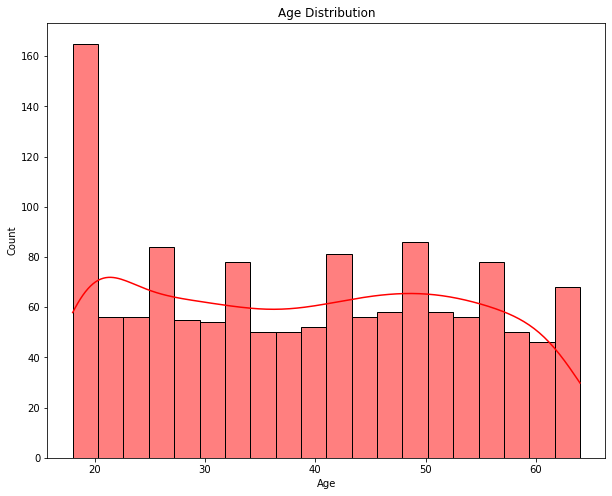

In [17]:
#age distribution
plt.figure(figsize=(10,8))
sns.histplot(df.age,bins=20, kde=True,color='red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Gender Distribution')

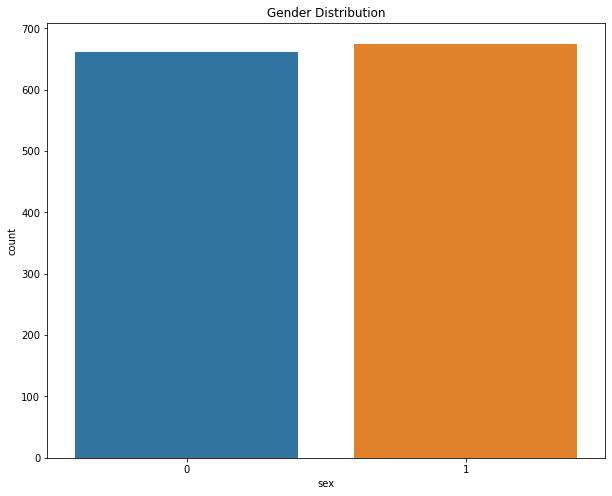

In [18]:
#gender plot
plt.figure(figsize=(10,8))
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')

It is clear that number of males and females are almost equal in the dataset.

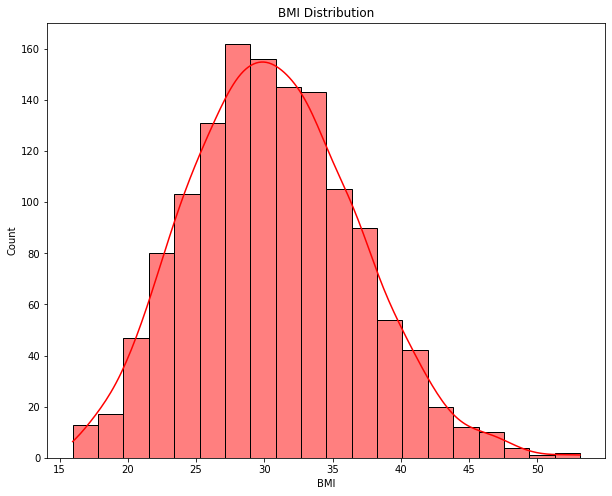

In [19]:
#bmi distribution
plt.figure(figsize=(10,8))
sns.histplot(df.bmi,bins=20, kde=True,color='red')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

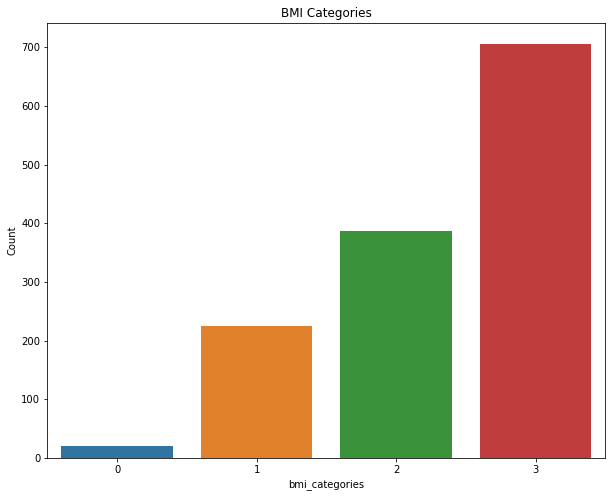

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'bmi_categories', data = df1)
plt.title('BMI Categories')
plt.xlabel('bmi_categories')
plt.ylabel('Count')
plt.show()

The majority of the patients have BMI between 25 and 40 which is considered as overweight and could be a major factor in increasing the medical cost.

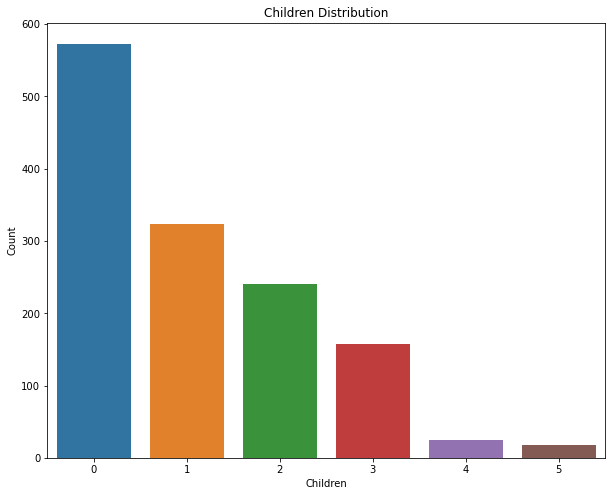

In [21]:
#child count distribution
plt.figure(figsize=(10,8))
sns.countplot(x = 'children', data = df)
plt.title('Children Distribution')
plt.xlabel('Children')
plt.ylabel('Count')
plt.show()

The graph clearly shows that most of the patients have no children and very few patients have more than 3 children.

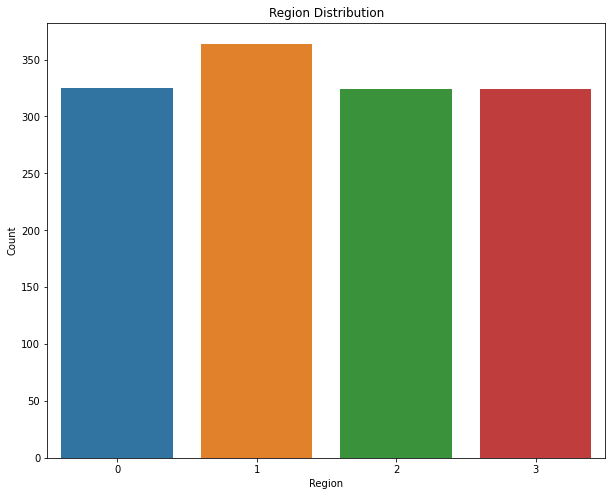

In [22]:
#regionwise plot
plt.figure(figsize=(10,8))
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

The count of patient from northwest is slighltly higher than the other regions, but the number of patients from other regions are almost equal.

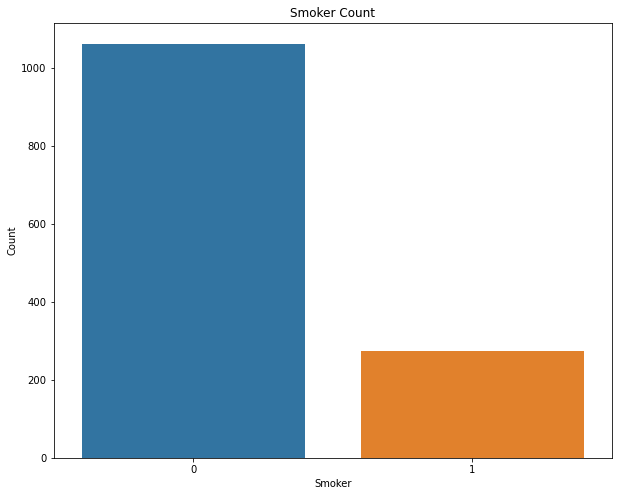

In [23]:
#count of smokers
plt.figure(figsize=(10,8))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

smokers are very few in the dataset. Nearly 80% of the patients are non-smokers.

Smoker count with respect to the children count.

<AxesSubplot:xlabel='smoker', ylabel='count'>

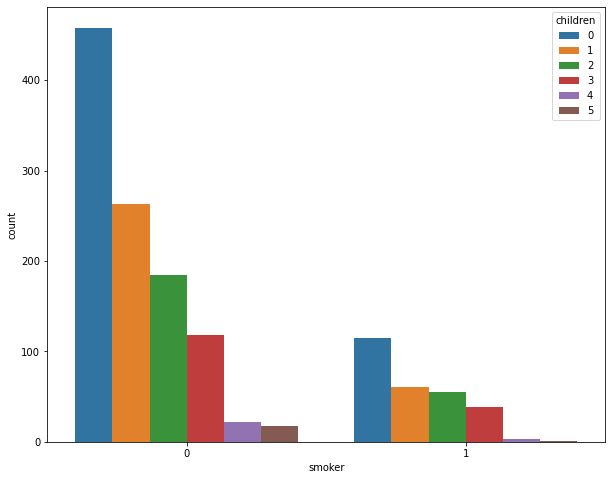

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x = df.smoker, hue = df.children)

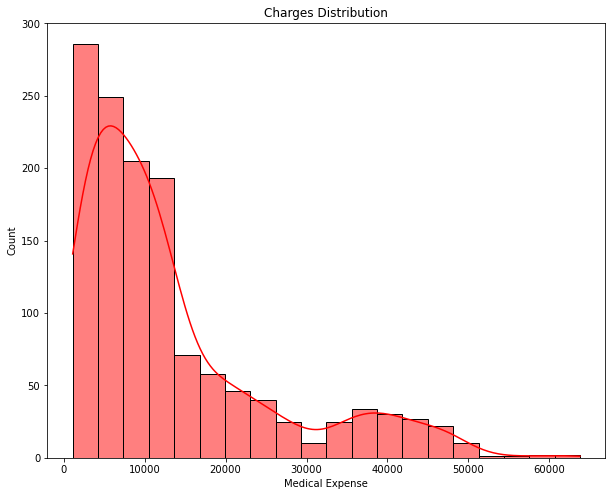

In [25]:
#charges distribution
plt.figure(figsize=(10,8))
sns.histplot(df.charges,bins=20, kde=True,color='red')
plt.title('Charges Distribution')
plt.xlabel('Medical Expense')
plt.ylabel('Count')
plt.show()

Most of the medical expenses are below 20000, with negligible number of patients having medical expenses above 50000.

From all the above plots, we have a clear understanding about the count of patients under each category of the variables. Now I will look into the coorelation between the variables.

## Coorelation

In [26]:
#coorelation matrix
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,-0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,-0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,-0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,-0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.002358,0.787234
region,-0.001626,-0.004936,-0.157574,-0.016258,0.002358,1.000000,0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,0.006547,1.000000


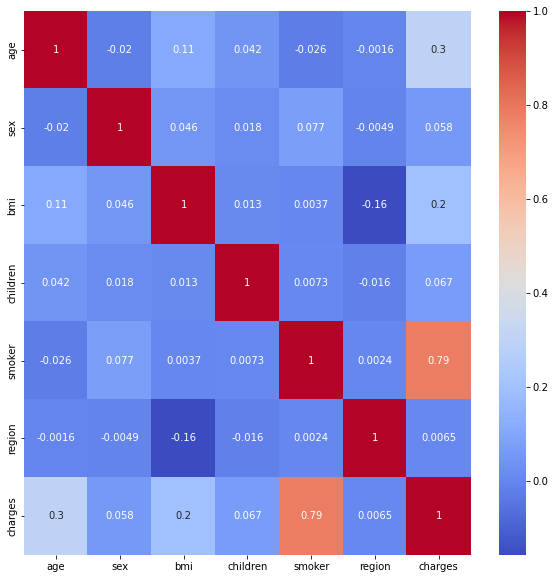

In [27]:
#plotting the coorelation heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

The variable smoker shows a significant coorelation with the medical expenses. Now I will explore more into patients' smoking habits and their relationa with other factors.

#### Plotting the smoker count with patient's gender

<Figure size 720x576 with 0 Axes>

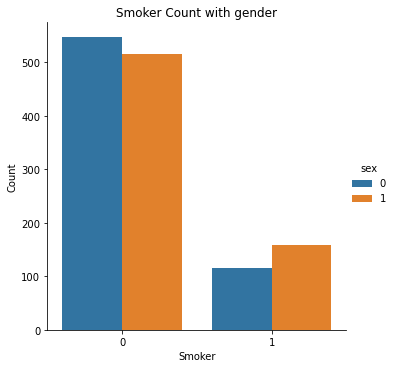

In [28]:
plt.figure(figsize=(10,8))
sns.catplot(x="smoker", kind="count",hue = 'sex', data=df)
plt.title('Smoker Count with gender')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

We can notice more male smokers than female smokers. So, I will assume that medical treatment expense for males would be more than females, given the impact of smoking on the medical expenses.

<AxesSubplot:xlabel='sex', ylabel='charges'>

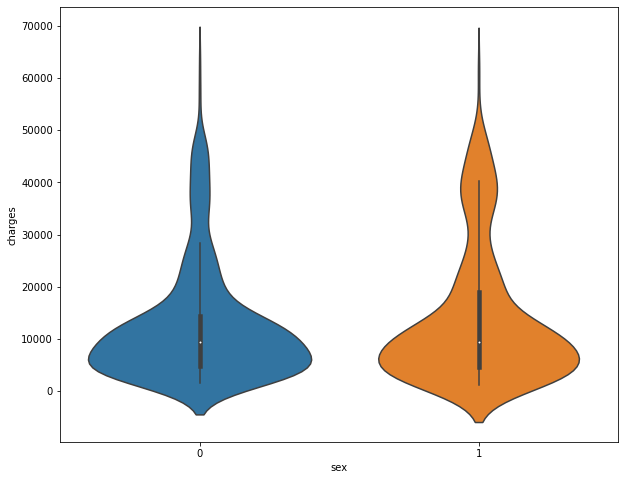

In [29]:
plt.figure(figsize = (10,8))
sns.violinplot(x = 'sex', y = 'charges', data = df)

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

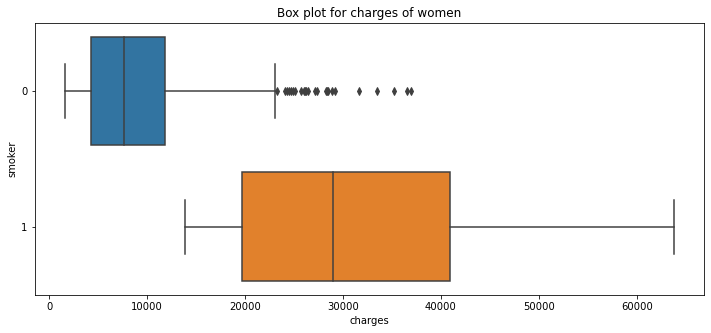

In [30]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)], orient="h")

<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

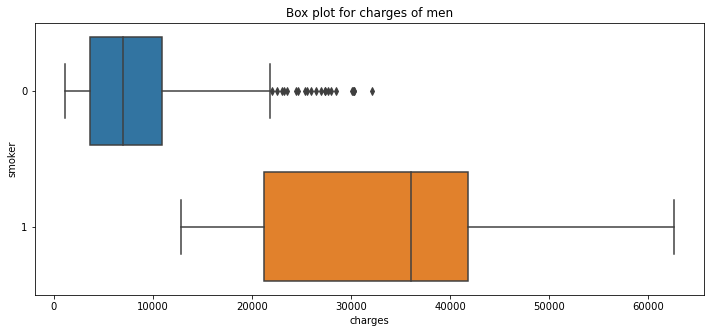

In [31]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)], orient = 'h')

The assumption is true, that the medical expense of males is greater than that of females. In addituion to that medical expense of smokers is greater than that of non-smokers.

#### Smokers and age distribution

<Figure size 720x720 with 0 Axes>

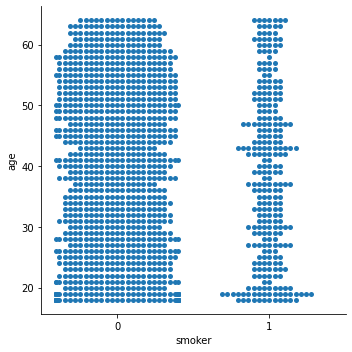

In [32]:
#smokers and age distribution
plt.figure(figsize = (10,10))
sns.catplot(x="smoker", y="age", kind="swarm", data=df)

From the graph, we can see that there significant number of smokers of age 19. Now I will study the medical expense of smokers of age 19.

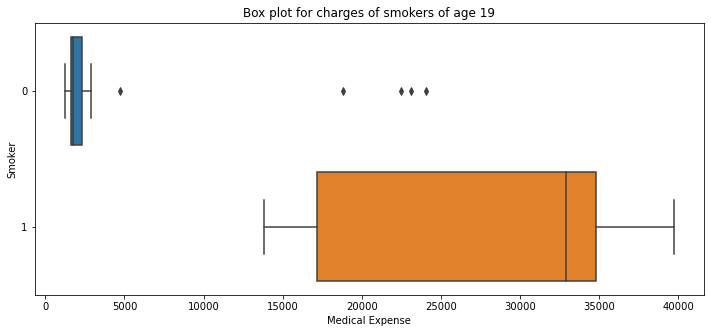

In [33]:
#smokers of age 19
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of smokers of age 19")
sns.boxplot(y="smoker", x="charges", data =  df[(df.age == 19)] , orient="h")
plt.xlabel('Medical Expense')
plt.ylabel('Smoker')
plt.show()

Surprisingly the medical expense of smokers of age 19 is very high in comparison to non smokers. In non smokers we can see some outliners, which may be due to illness or accidents.

It is clear that the medical expense of smokers is higher than that of non-smokers. Now I will plot the charges distribution with repect to patients age of smokers and non-smokers.

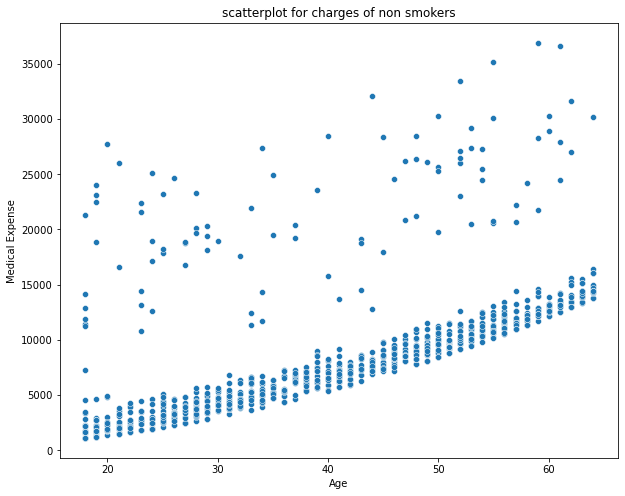

In [34]:
#non smokers charge distribution
plt.figure(figsize=(10,8))
plt.title("scatterplot for charges of non smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 0)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Majority of the points shows that medical expense increases with age which may be due to the fact that older people are more prone to illness. But there are some outliners which shows that there are other illness or accidents which may increase the medical expense.

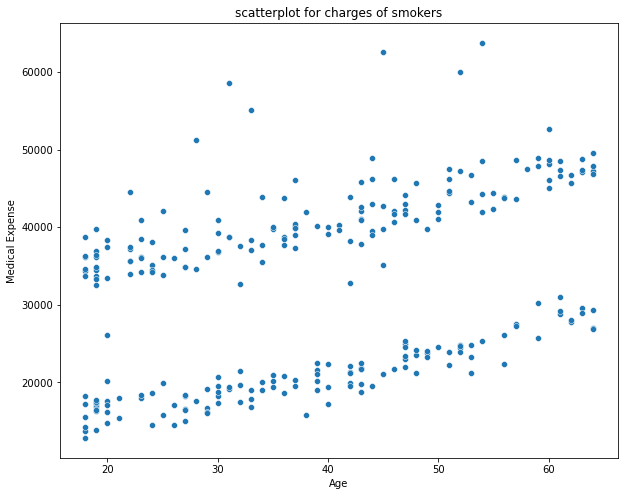

In [35]:
#smokers charge distribution
plt.figure(figsize=(10,8))
plt.title("scatterplot for charges of smokers")
sns.scatterplot(x="age", y="charges", data =  df[(df.smoker == 1)])
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Here we see pecularity in the graph. In the graph there are two segments, one with high medical expense which may be due to smoking related illness and the other with low medical expense which may be due age related illness.

Now, in order to get a more clear picture, I will combine these two graphs.

<Figure size 864x720 with 0 Axes>

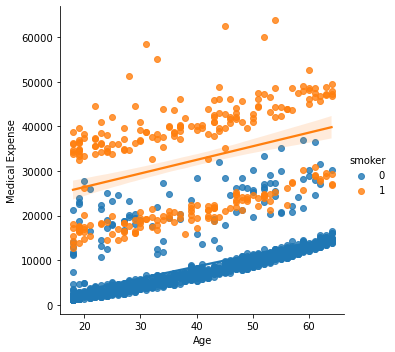

In [36]:
#age charges distribution
plt.figure(figsize=(12,10))
sns.lmplot(x="age", y="charges", data =  df, hue = 'smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expense')
plt.show()

Now, we clearly understand the variation in charges with respect to age and smoking habits. The medical expense of smokers is higher than that of non-smokers.
In non-smokers, the cost of treatment increases with age which is obvious. But in smokers, the cost of treatment is high even for younger patients, which means the smoking patients are spending upon their smoking related illness as well as age related illness.

#### Charges distribution for patients with BMI greater than 30 i.e. obese patients

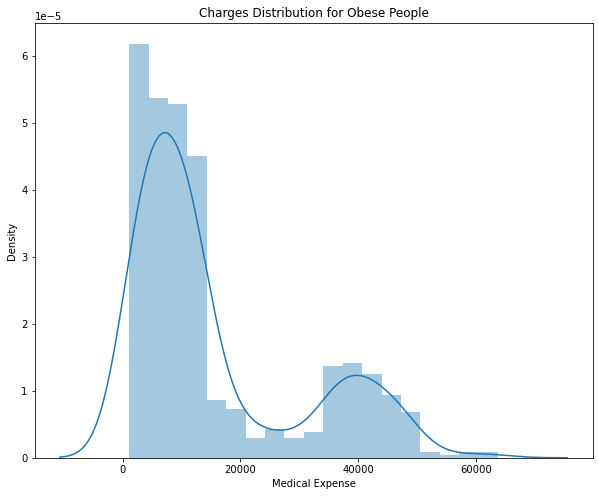

In [37]:
#bmi charges distribution for obese people
plt.figure(figsize=(10,8))
sns.distplot(df[(df.bmi >= 30)]['charges'])
plt.title('Charges Distribution for Obese People')
plt.xlabel('Medical Expense')
plt.show()

#### Charges distribution for patients with BMI less than 30 i.e. healthy patients

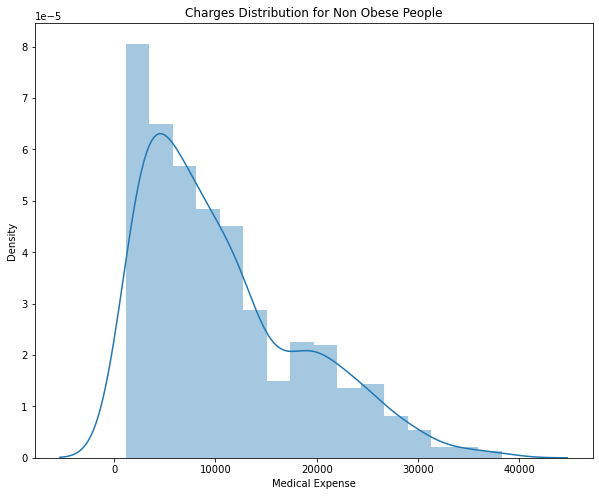

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(df[(df.bmi < 30)]['charges'])
plt.title('Charges Distribution for Non Obese People')
plt.xlabel('Medical Expense')
plt.show()

Therefore, patients with BMI less than 30 are spending less on medical treatment than those with BMI greater than 30.

##### Through the EDA, we have a clear understanding about the data and the coorelation between the variables. Now, I will build a model to predict the medical expense of patients.

In [39]:
unclean_df = df.copy()

# importing libraries for assesing the degree of multicolinearity amongst the variable
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function for tabulating the score of multicolinearity of aeach column in descending order
def calc_vif(x):
    vif=pd.DataFrame()
    vif['column']=x.columns
    vif['vif']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    # Sort the DataFrame by 'vif' column in descending order
    vif = vif.sort_values(by='vif', ascending=False)
    return vif

# function to iterate the drop in the columns with the highest variance enflation factor score 
# iterates the conditional loop untill the highest vif score is less or equal to 5 and outputs the resulting data

def drop_high_vif_columns(df, threshold=5):
    while True:
        vif_result = calc_vif(df)
        highest_vif_column = vif_result.iloc[0]['column']
        highest_vif_value = vif_result.iloc[0]['vif']
        
        if highest_vif_value > threshold:
            print(f"Dropping column '{highest_vif_column}' with VIF {highest_vif_value:.2f}")
            df = df.drop(columns=highest_vif_column)
        else:
            print("VIF condition satisfied. Stopping the process.")
            break

    return df

clean_df = drop_high_vif_columns(unclean_df)

calc_vif(clean_df)

Dropping column 'age' with VIF 9.50
Dropping column 'charges' with VIF 6.44
VIF condition satisfied. Stopping the process.


,column,vif
1,bmi,4.033742
4,region,2.458468
0,sex,2.003736
2,children,1.786304
3,smoker,1.258387


## Train Test Split

In [40]:
x = df.drop('charges', axis=1)
y = df['charges']

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Model Building

### Linear Regression

In [42]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr.score(x_train, y_train)

0.7487799749798774

### Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2) 
#transforming the features to higher degree
x_train_poly = poly_reg.fit_transform(x_train)
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.2, random_state=0)

In [44]:
plr = LinearRegression()
#model training
plr.fit(x_train,y_train)
#model prediction
y_pred = plr.predict(x_test)
#model accuracy
plr.score(x_train,y_train)

0.8259132659865984

In [ ]:
plr.predict([[28,1	33.000	3	0	1]])

### Decision Tree Regressor

In [45]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
#model training
dtree.fit(x_train,y_train)
#model prediction
dtree_pred = dtree.predict(x_test)
#model accuracy
dtree.score(x_train,y_train)

0.9978648746631862

### Random Forest Regressor

In [46]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
#model training
rf.fit(x_train,y_train)
#model prediction
rf_pred = rf.predict(x_test)
#model accuracy
rf.score(x_train,y_train)

0.9749231728205205

## Model Evaluation

In [47]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

### Linear Regression

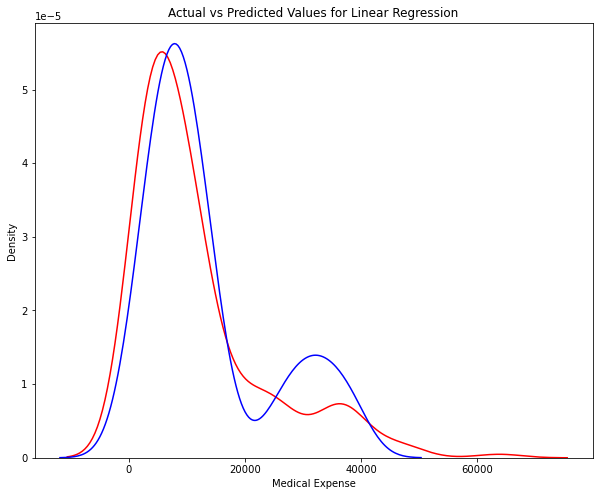

In [48]:
#distribution of actual and predicted values
plt.figure(figsize=(10,8))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(lr_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

In [49]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 2885.020552406542
MSE: 19597949.874485858
RMSE: 4426.957180105299
R2 Score: 0.8491318575384013


### Polynomial Regression

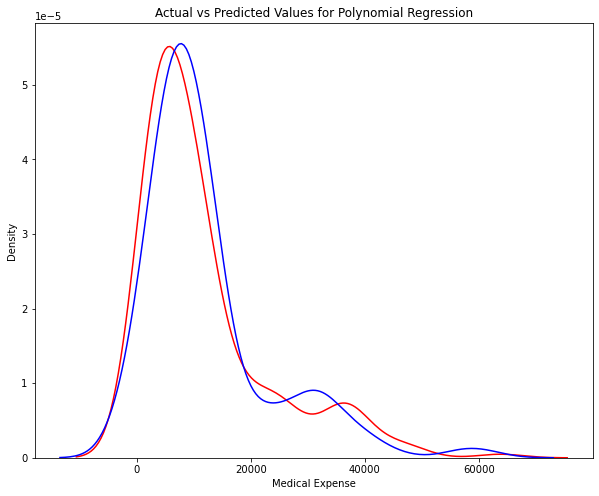

In [50]:
#acutal vs predicted values for polynomial regression
plt.figure(figsize=(10,8))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Polynomial Regression')
plt.xlabel('Medical Expense')
plt.show()

In [51]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 2885.020552406542
MSE: 19597949.874485858
RMSE: 4426.957180105299
R2 Score: 0.8491318575384013


### Decision Tree Regressor

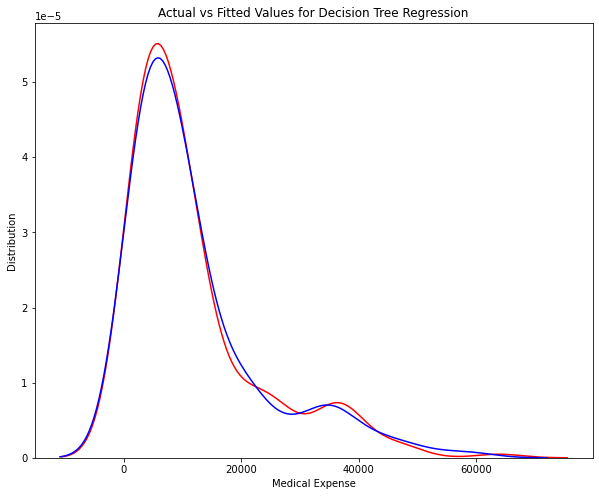

In [52]:
#distribution plot of actual and predicted values
plt.figure(figsize=(10,8))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [53]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(x_test,y_test))

MAE: 2523.352618714953
MSE: 34976757.28847377
RMSE: 5914.115089214427
Accuracy: 0.7307433463582804


### Random Forest Regressor

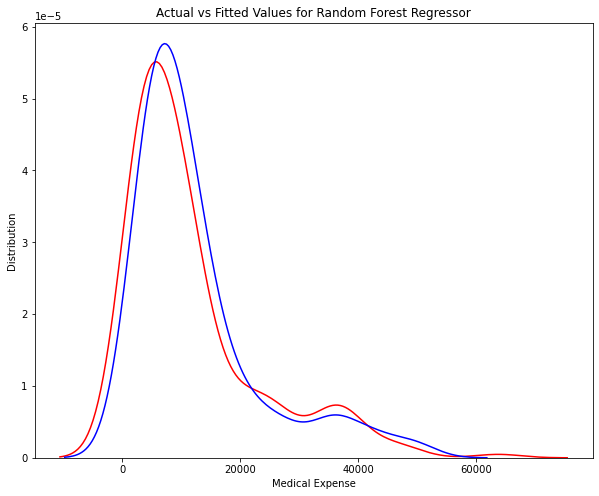

In [54]:
#distribution plot of actual and predicted values
plt.figure(figsize=(10,8))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [55]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(x_test,y_test))

MAE: 2307.4340666101007
MSE: 17759043.2920525
RMSE: 4214.147991237672
Accuracy: 0.8632880535705848


In [56]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [66]:
x.shape

(1337, 6)

In [57]:
import pickle

In [58]:
pickle.dump(rf, open("model.pkl", "wb"))

In [60]:
model = pickle.load(open("model.pkl", "rb"))

print(model.predict([[32,1,28.8,0,0,2]]))

ValueError: X has 6 features, but RandomForestRegressor is expecting 28 features as input.

## Conclusion
From the above models, the Random Forest Regressoris giving the best results and has the least RMSE value. Therefore, I will use Random Forest Regressor to predict the medical expense of patients.


Moreover, the medical expense of smokers is higher than that of non-smokers. The medical expense of patients with BMI greater than 30 is higher than that of patients with BMI less than 30. The medical expense of older patients is higher than that of younger patients.

Thus, from the overall analysis, we can conclude that the medical expense of patients depends on their age, BMI, smoking habits.